# Insights seaborn - equipe Zebra 2021



In [ ]:
# __Version__ : 0.0.1
# __Release__: Arthur Chabole 29/04/21

'''Este algoritmo é um resumo dos principais plots para visualização de dados possíveis 
de serem construidos com a bilioteca seaborn.'''

In [ ]:
#Seaborn já vem instalado com o pacote anaconda, caso não esteja execute esta célula.
pip install seaborn

In [ ]:
#Links para documentação e exemplos
'''https://seaborn.pydata.org/introduction.html'''  #exemplos de visualização de dados
'''https://seaborn.pydata.org/api.html'''           #exemplos das APIs

#Links para encontrar cores
'''https://color.adobe.com/pt/create/color-wheel''' #Código das cores

In [3]:
#Importação das bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importando os dados

Importando dados locais do computador

In [ ]:
#Arquivos em txt
Dados1_df = pd.read.csv('C:/arquivos/exemplo/arquivo_desejado.txt', delimiter = "\t") #Separador como 'Tab'

In [ ]:
#Arquivos excel
Dados2_df = pd.read.excel('C:/arquivos/exemplo/arquivo_desejado.xlsx') 

Importando dados inclusos da biblioteca seaborn

In [ ]:
'''A biblioteca seaborn já trás alguns pacotes de dados integrados a ela. Vamos usa-los nesse exemplo. 
Segue a lista a baixo dos dados previamente instalados junto com a seaborn.'''

In [8]:
# Dados já incluidos na biblioteca
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [120]:
# importando dados: acidentes do titanic
titanic_df = sns.load_dataset('titanic')

## Métodos úteis

Visualizar dados

In [229]:
# Mostrar as primeiras linhas
titanic_df.head(3)

# Mostrar uma amostra aleatória
titanic_df.sample(3)

# Mostrar as Ultimas linhas
titanic_df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [232]:
#informações gerais do dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [238]:
#Visualizar uma coluna
titanic_df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

In [122]:
#Mostrar todos as colunas contidas no data frame
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [244]:
# Análise rápida das principais métricas estatísticas do data frame
titanic_df.describe()

#Para coluna específica - age
#titanic_df.age.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [243]:
média = titanic_df['age'].mean()   #Médias das idades
desvio_p = titanic_df['age'].std() #Desvio padrão das idades
var = titanic_df['age'].var()      #Variância das idades
soma = titanic_df['age'].sum()     #Soma das idades

print(média, desvio_p, var, soma)

29.69911764705882 14.526497332334044 211.0191247463081 21205.17


In [119]:
# Transformar uma coluna do dataframe em valores array
titanic_df['class'].values

['Third', 'First', 'Third', 'First', 'Third', ..., 'Second', 'First', 'Third', 'First', 'Third']
Length: 891
Categories (3, object): ['First', 'Second', 'Third']

Excluir dados

In [237]:
#Excluir colunas por título
titanic_Drop_df = titanic_df.drop(['alone','sex', 'age'], axis=1)

titanic_Drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(4), object(4)
memory usage: 72.8+ KB


## Distribuition plot
Gráficos de distribuição de dados das farifas (fare) x idade (age)

<AxesSubplot:xlabel='age', ylabel='fare'>

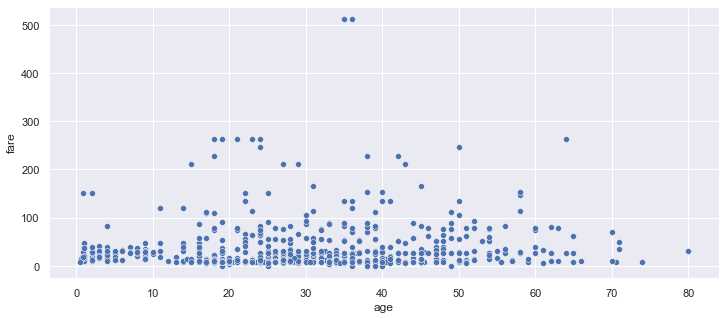

In [141]:
#Configurando o tamanho da figura
sns.set(rc={'figure.figsize':(12,5)})

sns.scatterplot(x='age', y='fare', data=titanic_df)

<AxesSubplot:xlabel='age', ylabel='class'>

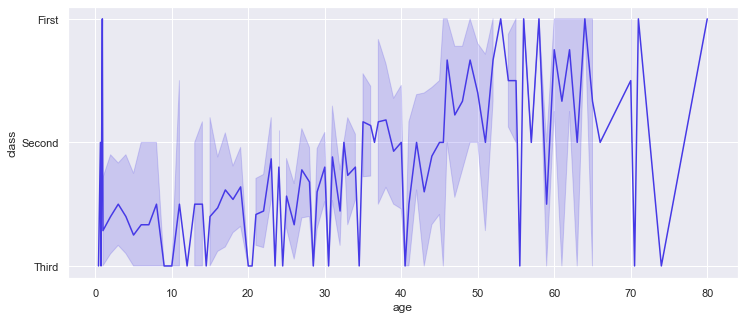

In [142]:
sns.lineplot(x='age', y='class', data=titanic_df, color='#4639E6') #ci=True

<AxesSubplot:xlabel='age', ylabel='class'>

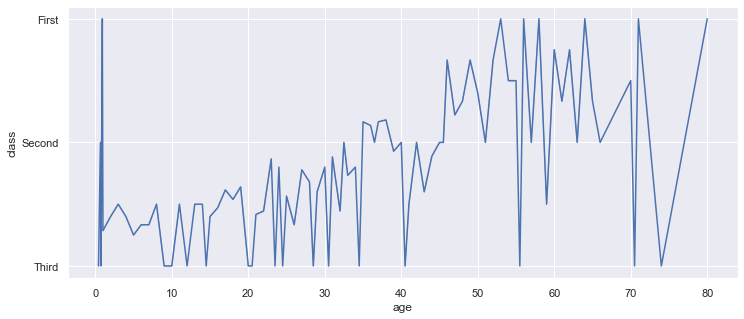

In [143]:
sns.lineplot(x='age', y='class', data=titanic_df, ci=False)

<AxesSubplot:xlabel='age', ylabel='class'>

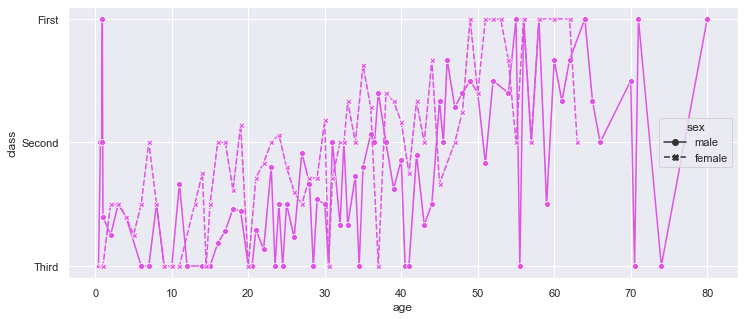

In [144]:
#Adicionando marcadores 
sns.lineplot(x='age', y='class', data=titanic_df, ci=True, style='sex', markers=True, color= '#E053E6')

<AxesSubplot:xlabel='age', ylabel='fare'>

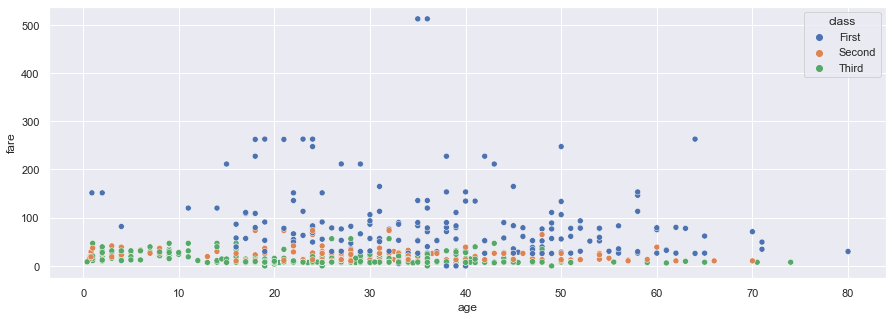

In [146]:
#Adicionando categorias hue, organizando por classes: 'Hue='class''
sns.scatterplot(x='age', y='fare', data=titanic_df, hue='class')

<AxesSubplot:xlabel='age', ylabel='class'>

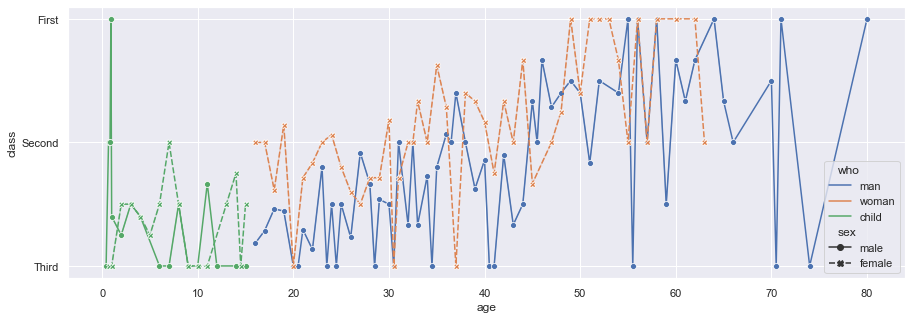

In [161]:
#Configurando o tamanho da figura
sns.set(rc={'figure.figsize':(15,5)})

#Adicionando marcadores e categorias - hue & style 
sns.lineplot(x='age', y='class', data=titanic_df, ci=True, style='sex', hue='who', markers=True)

<AxesSubplot:xlabel='age', ylabel='fare'>

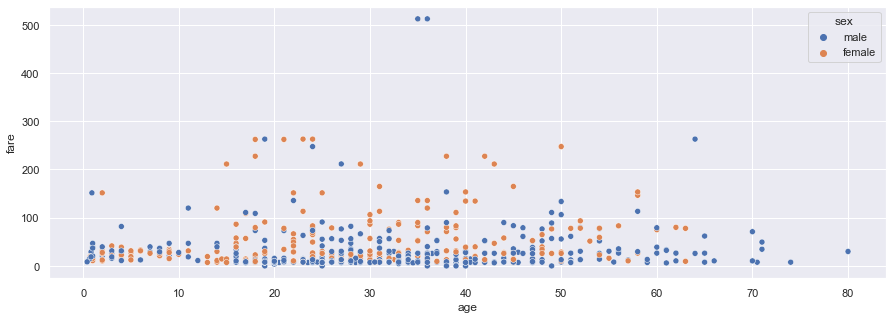

In [147]:
sns.scatterplot(x='age', y='fare', data=titanic_df, hue='sex')

<AxesSubplot:xlabel='age', ylabel='fare'>

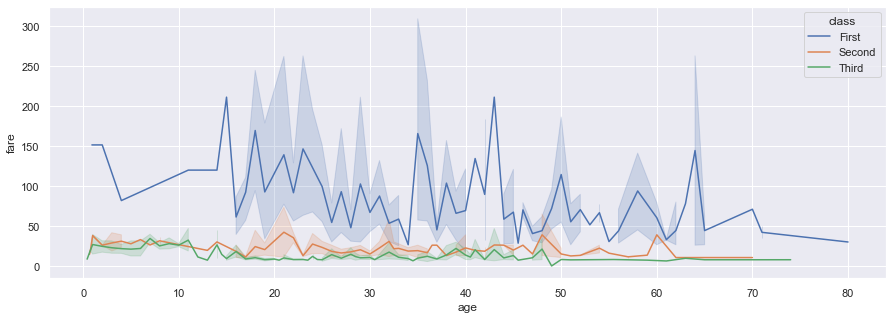

In [148]:
sns.lineplot(x='age', y='fare', data=titanic_df, hue='class')

<AxesSubplot:xlabel='age', ylabel='Count'>

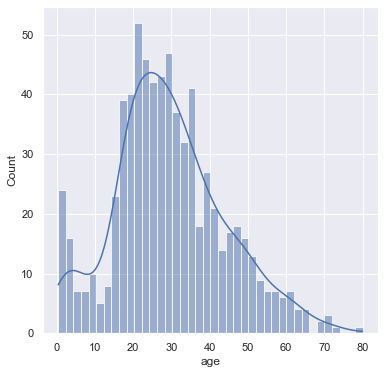

In [139]:
#criando a figura 
fig, ax = plt.subplots(figsize=(6, 6))

# Histograma 
sns.histplot(titanic_df['age'], kde=True, bins=40)

<AxesSubplot:xlabel='fare', ylabel='Count'>

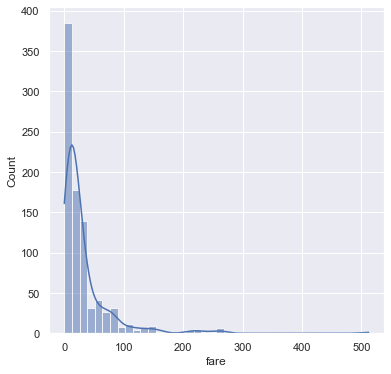

In [180]:
#criando a figura 
fig, ax = plt.subplots(figsize=(6, 6))

# Histograma 
sns.histplot(titanic_df['fare'], kde=True, bins=40)

In [ ]:
#criando a figura 
fig, ax = plt.subplots(figsize=(6, 6))

# Histograma 
sns.histplot(titanic_df['age'], kde=False, bins=25)

## Criando  uma figura com vários plots

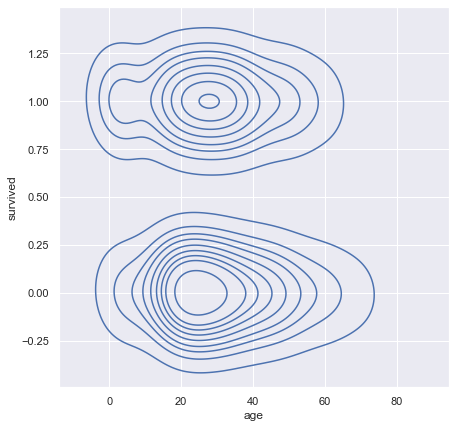

In [92]:
#criando a figura 
fig, ax = plt.subplots(figsize=(7, 7))

#Adicionando plots na figura
sns.kdeplot(x='age', y='survived', data=titanic_df, fill=False)  #Curvas de nível sólidas

ax.grid(linestyle='-', linewidth=1)

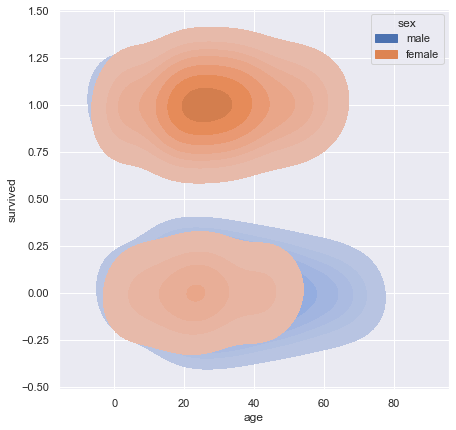

In [99]:
#criando a figura 
fig, ax = plt.subplots(figsize=(7, 7))

#Adicionando plots na figura
sns.kdeplot(x='age', y='survived', data=titanic_df, fill=True, hue='sex', levels=10)  #Curvas de nível sólidas

ax.grid(linestyle='-', linewidth=1)

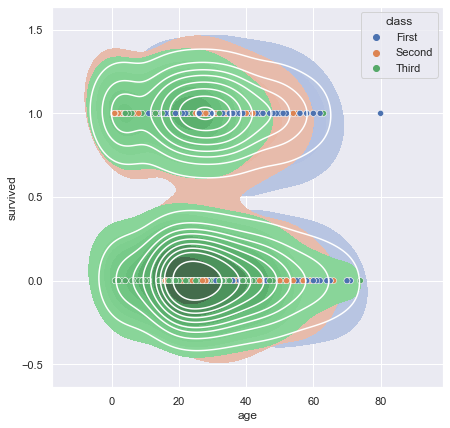

In [93]:
#criando a figura 
fig, ax = plt.subplots(figsize=(7, 7))

#Adicionando plots na figura
sns.kdeplot(x='age', y='survived', data=titanic_df, fill=True,  hue='class')  #Curvas de nível sólidas
sns.kdeplot(x='age', y='survived', data=titanic_df, fill=False, color='white') #Curvas de nível contorno
sns.scatterplot(x='age', y='survived', data=titanic_df, hue='class', estimator=np.mean)  #Pontos de dispersão   

ax.grid(linestyle='-', linewidth=1)

## Criando subplots na figura

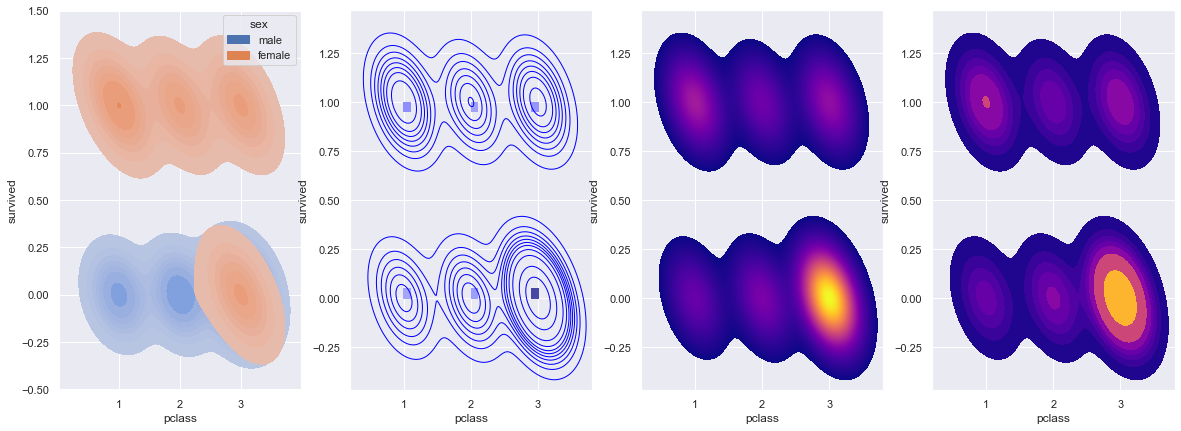

In [169]:
#criando a figura com 4 subplots com 2 linha, 2 colunas e formatando o tamanho.
fig, (subplot_1, subplot_2, subplot_3, subplot_4) = plt.subplots(1, 4, figsize=(20, 7))

#Adicionando subplot_1
sns.kdeplot(x='pclass', y='survived', data=titanic_df, fill=True, ax=subplot_1, hue='sex')  #Pontos de dispersão   

#Adicionando subplot_2
#Curvas de nível contorno
sns.kdeplot(x='pclass', y='survived', data=titanic_df, fill=False, color='blue', levels=12, ax=subplot_2, linewidths=1) 
sns.histplot(x='pclass', y='survived', data=titanic_df, fill=False, color='blue', ax=subplot_2, bins=20)

#Adicionando subplot_3
#Curvas de nível sólidas
sns.kdeplot(x='pclass', y='survived', data=titanic_df, fill=True, cmap='plasma', levels=1000, ax=subplot_3) 

#Adicionando subplot_4
#Curvas de nível sólidas
sns.kdeplot(x='pclass', y='survived', data=titanic_df, fill=True, cmap='plasma', levels=8, ax=subplot_4)  

ax.grid(linestyle='-', linewidth=1)

## Joint plot

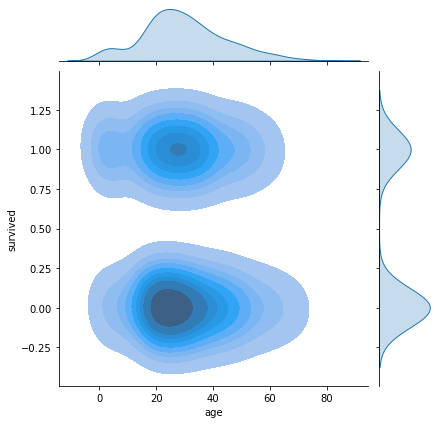

In [18]:
sns.jointplot(x='age', y='survived', data=titanic_df, kind='kde', fill=True)

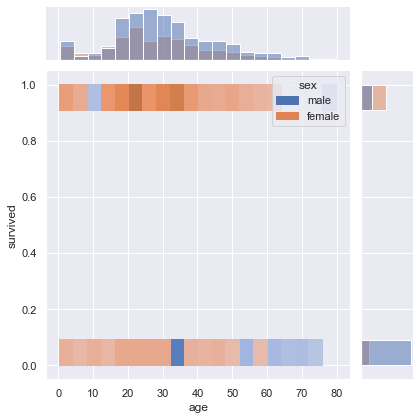

In [80]:
sns.jointplot(x='age', y='survived', data=titanic_df, kind='hist', hue='sex')

## KDE plot

<AxesSubplot:xlabel='age', ylabel='Density'>

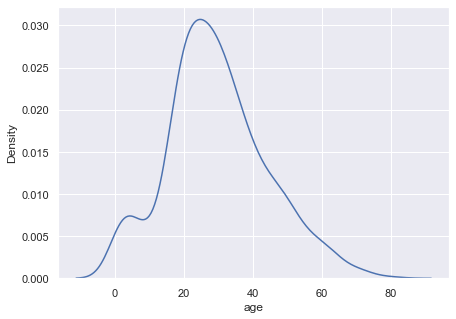

In [82]:
#Configurando o tamanho da figura
sns.set(rc={'figure.figsize':(7,5)})

sns.kdeplot(titanic_df['age'])

<AxesSubplot:xlabel='survived', ylabel='Density'>

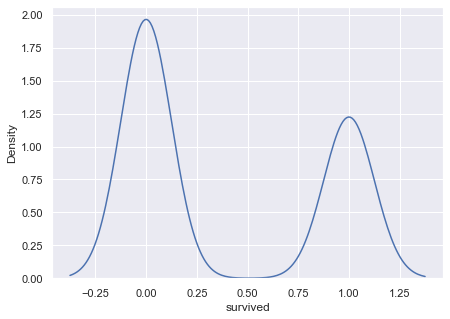

In [84]:
sns.kdeplot(titanic_df['survived'])

## Pair plots

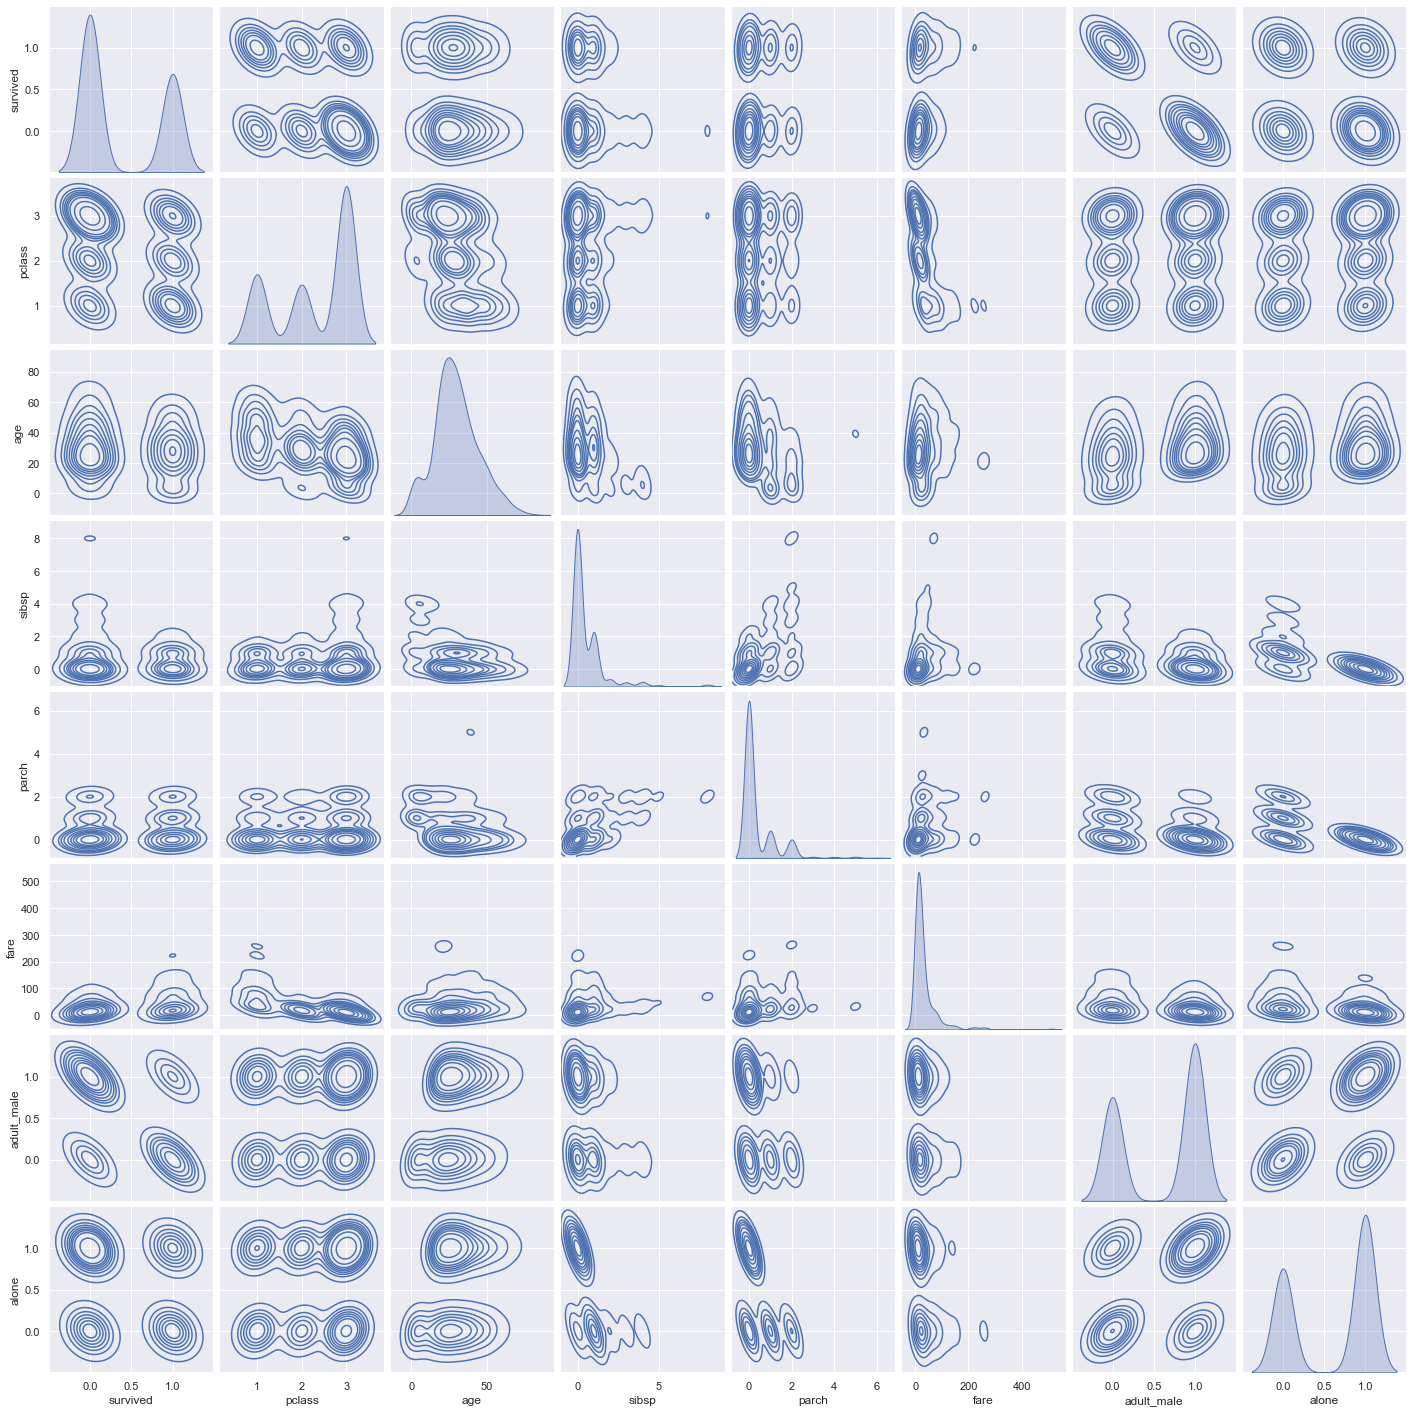

In [175]:
sns.pairplot(titanic_df, palette='Blues', kind='kde')

#outras possibilidade de pairplot
# kind='kde', kind='hist', kind='reg', kind='scatter'

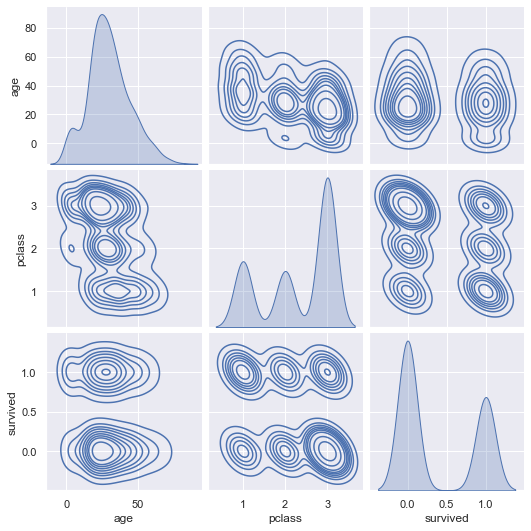

In [184]:
#Separando pairplots em colunas desejadas
sns.pairplot(titanic_df[['age', 'pclass','survived']], palette='Blues', kind='kde')

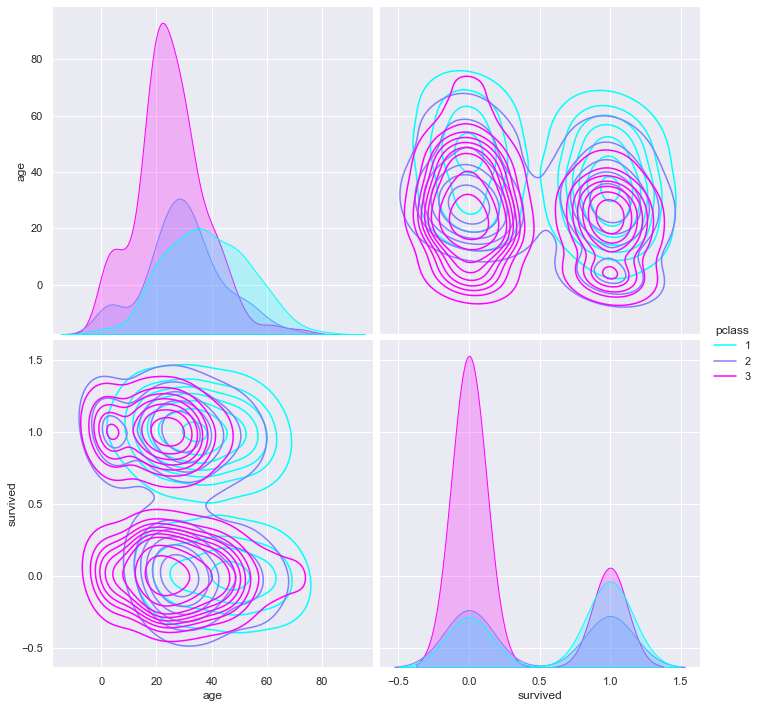

In [209]:
#Separando pairplots em colunas desejadas e adicionando categorias
sns.pairplot(titanic_df[['age', 'pclass','survived']], palette='cool', kind='kde', hue='pclass', height=5)

## Estilos  & Palettes

'palette=Greys, Purples, Blues, Greens, Reds, BuGn ...'

<Figure size 360x288 with 0 Axes>

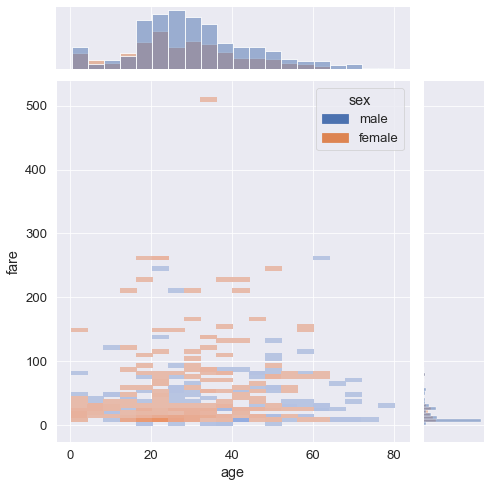

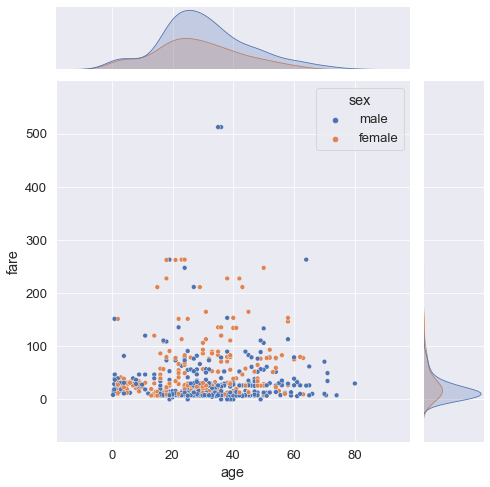

In [249]:
#Personalização
sns.set_style('darkgrid')
plt.figure(figsize=(5, 4))
sns.set_context('paper', font_scale=1.5) #paper, poster, talk

#Plots
sns.jointplot(x='age', y='fare', data=titanic_df, kind='hist', hue='sex', height=7)
sns.jointplot(x='age', y='fare', data=titanic_df,  hue='sex', height=7)

#Palettes(colormaps) onde encontrar
link= 'https://matplotlib.org/stable/tutorials/colors/colormaps.html'

#Exemplos
'''palette=Greys, Purples, Blues, Greens, Reds, BuGn ...'''


# Plots por categoria
Gráficos por formação de grupos

## Bar plots


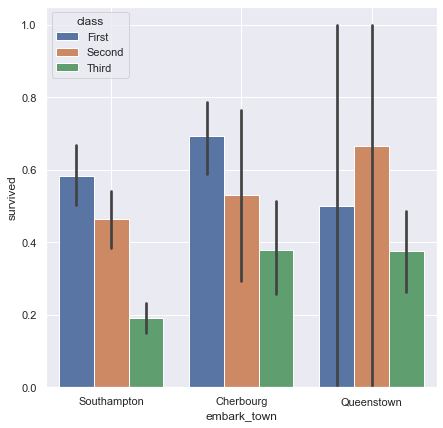

In [234]:
#criando a figura 
fig, ax = plt.subplots(figsize=(7, 7))

#Adicionando plot na figura
sns.barplot(x='embark_town', y='survived', data=titanic_df, hue='class') 

ax.grid(linestyle='-', linewidth=1)

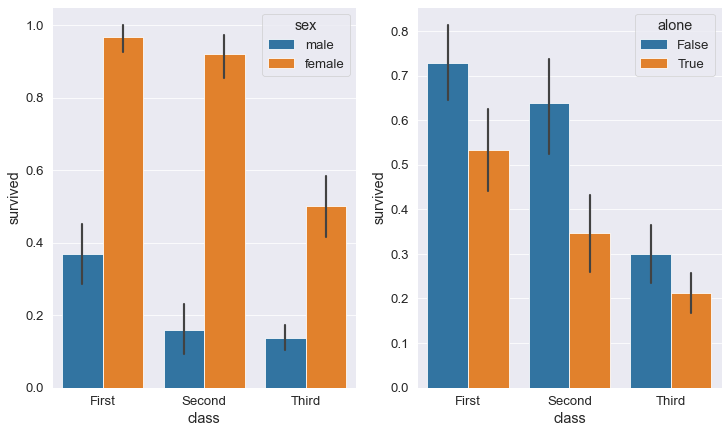

In [54]:
#criando a figura 
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(12, 7))

#Adicionando plots ax_1 na figura
sns.barplot(x='class', y='survived', data=titanic_df, hue='sex', ax=ax_1) 

#Adicionando plots ax_2 na figura
sns.barplot(x='class', y='survived', data=titanic_df, hue='alone', ax=ax_2)

ax.grid(linestyle='-', linewidth=1)

<AxesSubplot:xlabel='survived', ylabel='age'>

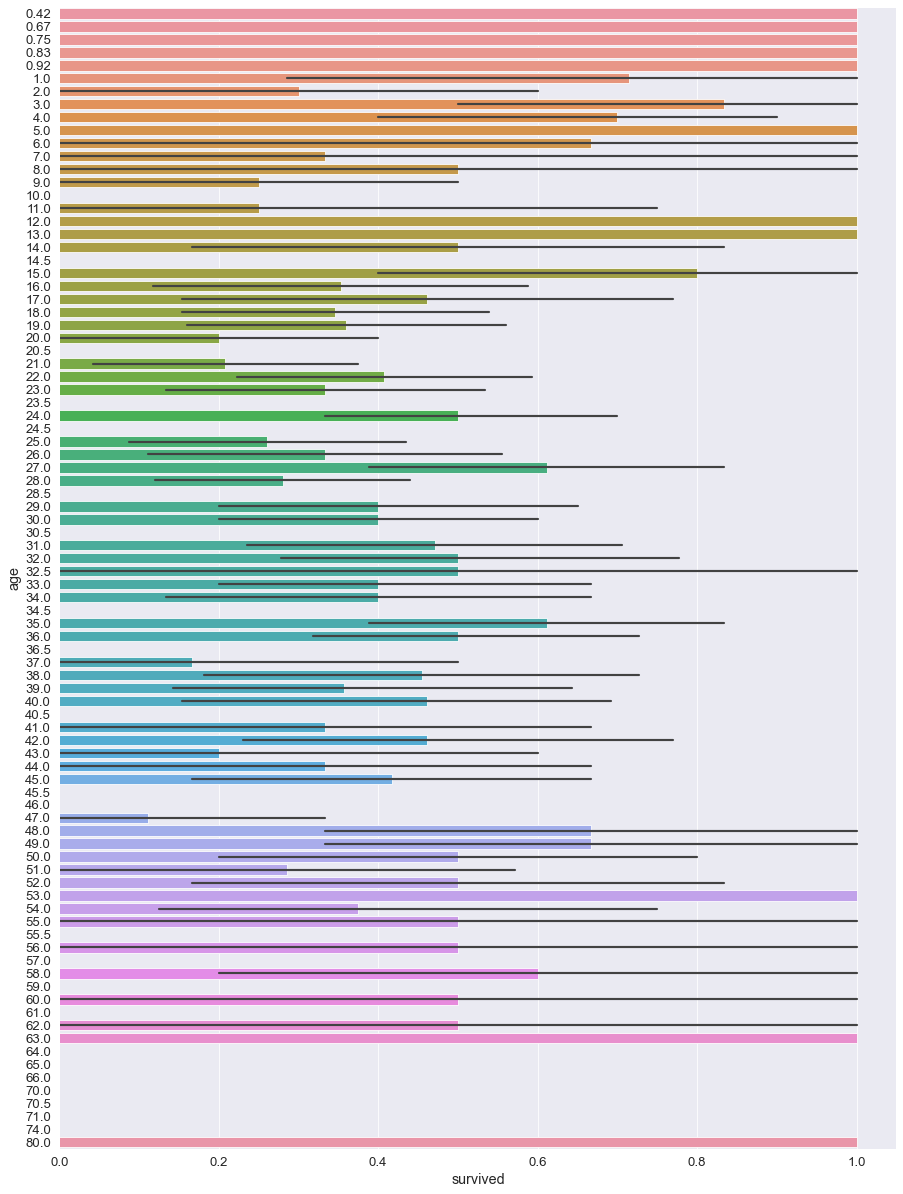

In [62]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 21))
sns.set_context('paper', font_scale=1.5)

sns.barplot(x='survived', y='age', data=titanic_df, orient='h') #np.std, np.var

## Dados de gorgetas

In [64]:
# Dados de gorjetas  
tips_df = sns.load_dataset('tips') 
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

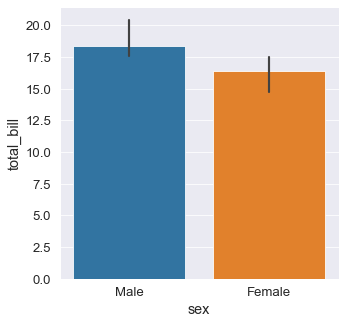

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))
sns.set_context('paper', font_scale=1.5)

sns.barplot(x='sex', y='total_bill', data=tips_df, 
            estimator=np.median) #np.std, np.var
            

<AxesSubplot:xlabel='size', ylabel='total_bill'>

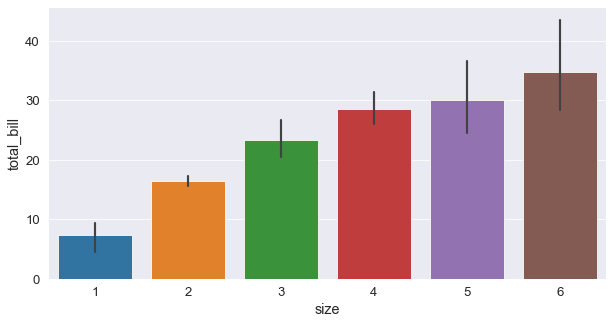

In [166]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.set_context('paper', font_scale=1.5)

sns.barplot(x='size', y='total_bill', data=tips_df) #np.std, np.var

<AxesSubplot:xlabel='time', ylabel='total_bill'>

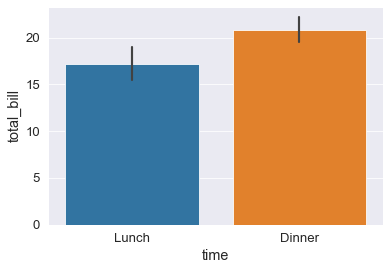

In [167]:
sns.barplot(x='time', y='total_bill', data=tips_df) #np.std, np.var

## Box plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

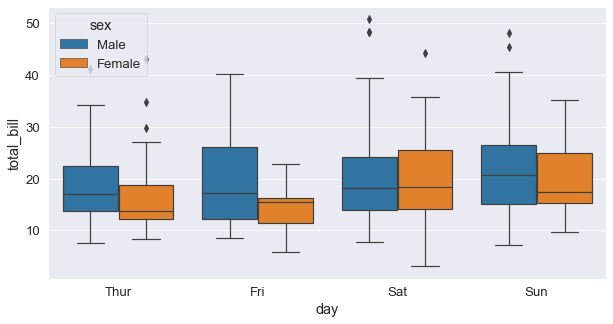

In [66]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.set_context('paper', font_scale=1.5)

sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

## Violin Plot 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

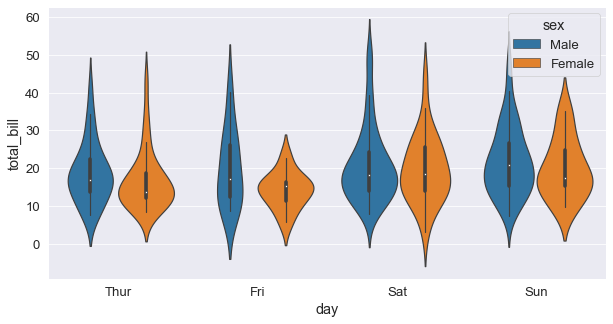

In [68]:
plt.figure(figsize=(10, 5))

sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

## Strip plot 


<AxesSubplot:xlabel='day', ylabel='total_bill'>

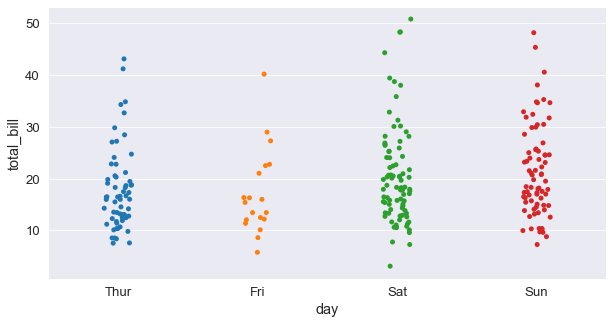

In [71]:
plt.figure(figsize=(10, 5))

sns.stripplot(x='day', y='total_bill', data=tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

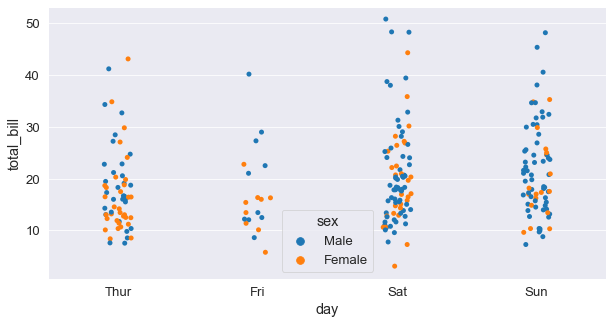

In [73]:
plt.figure(figsize=(10, 5))

sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

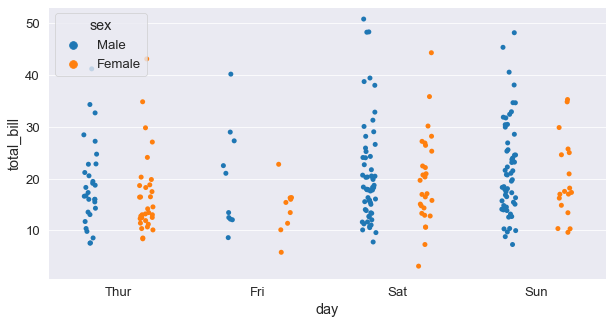

In [82]:
plt.figure(figsize=(10, 5))

sns.stripplot(x='day', y='total_bill', data=tips_df, 
              hue='sex', dodge=True)

## Swarm plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

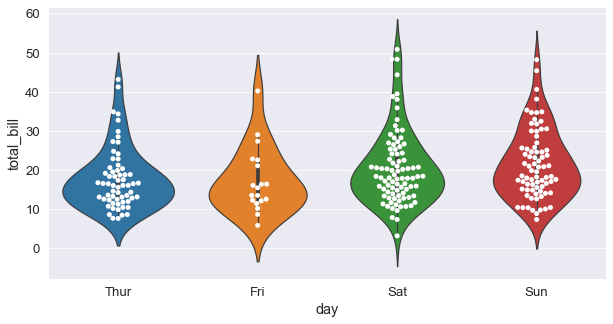

In [77]:
plt.figure(figsize=(10, 5))

sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

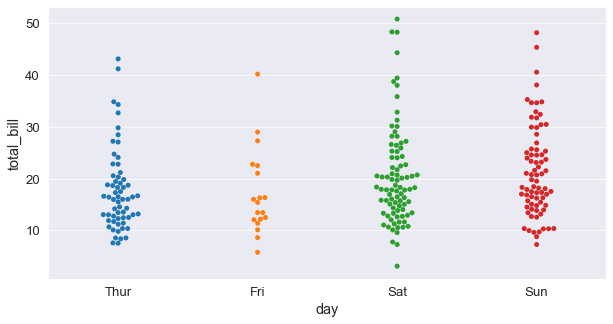

In [83]:
plt.figure(figsize=(10, 5))

sns.swarmplot(x='day', y='total_bill', data=tips_df)

# Matrix Plots 

## Heatmaps 

<AxesSubplot:>

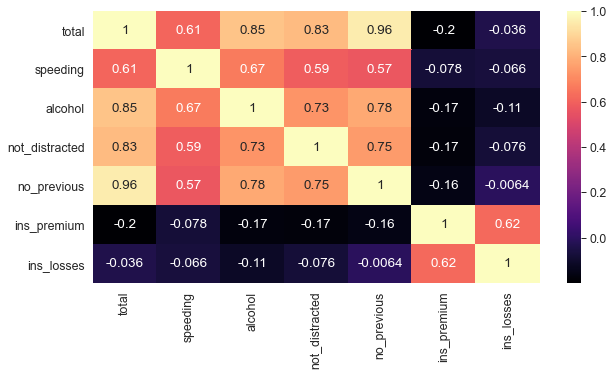

In [85]:
plt.figure(figsize=(10, 5))
sns.set_context('paper', font_scale=1.4)

crash_mx = dados_df.corr() #Correlações entre os dados

sns.heatmap(crash_mx, annot=True, cmap='magma') 

## Dados de voos 

In [72]:
# Dados de voo
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [73]:
flights_df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [74]:
# Formando os dados em anos
flights = flights_df.pivot_table(index='month', columns='year', values='passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

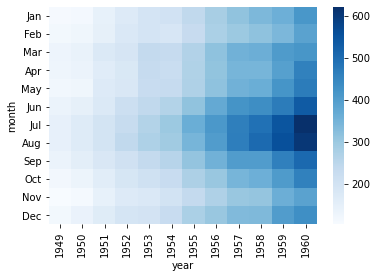

In [16]:
sns.heatmap(flights, cmap='Blues')

## Cluster heatmaps  

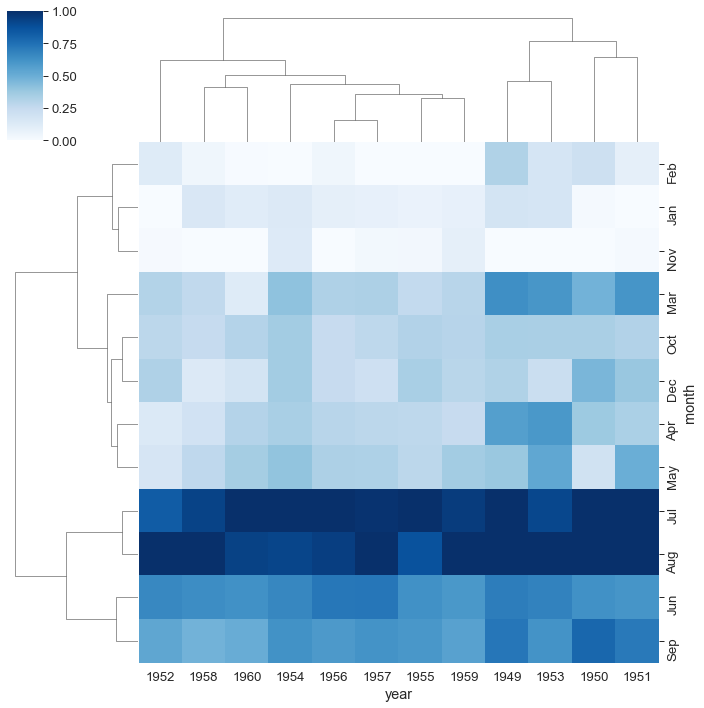

In [135]:
# Visualizar os dados com grupos 
sns.clustermap(flights, cmap='Blues', standard_scale=1)

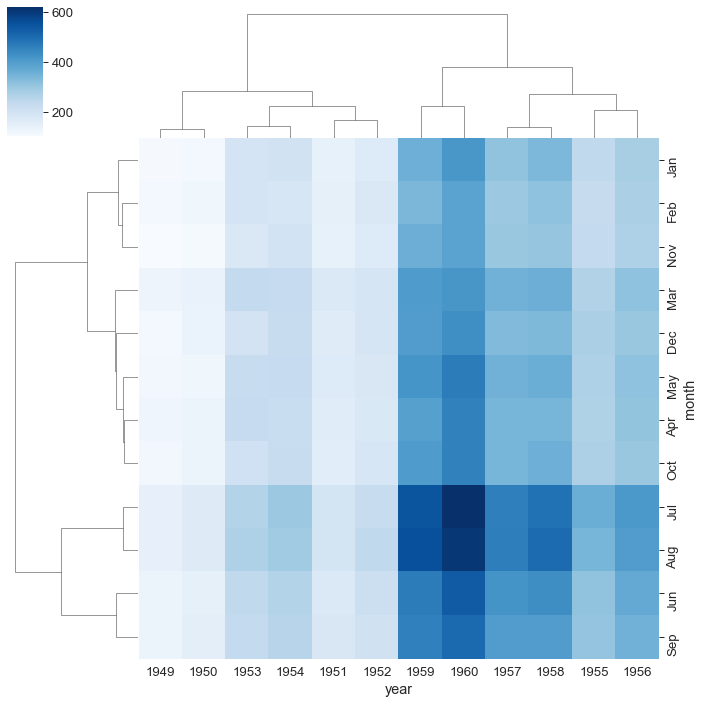

In [136]:
sns.clustermap(flights, cmap='Blues')

In [76]:
# Dados de iris
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


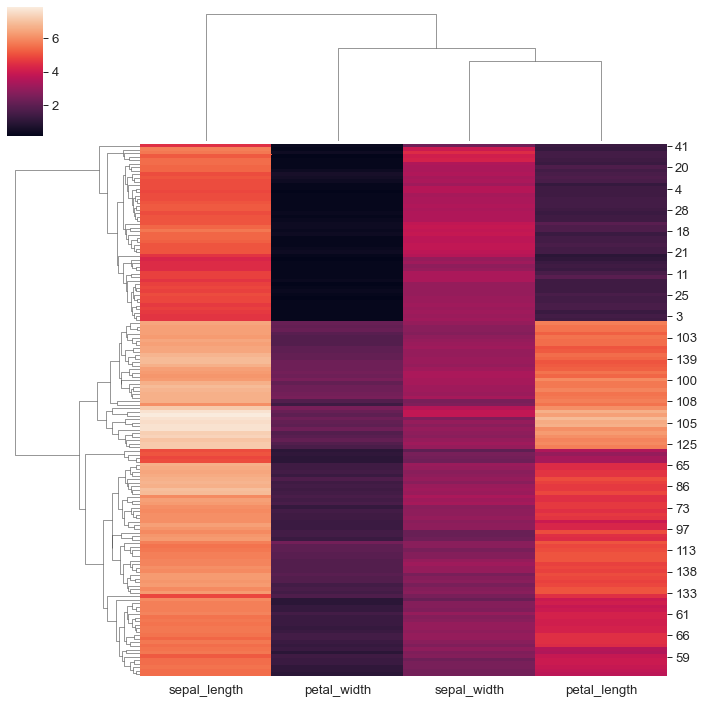

In [79]:
especies = iris_df.pop('species')
sns.clustermap(iris_df)